In [1]:
%load_ext sql

In [2]:
%sql sqlite:///./database/eleclog_copy.db

'Connected: @./database/eleclog_copy.db'

In [3]:
%sql select * from readings limit 1;

 * sqlite:///./database/eleclog_copy.db
Done.


timestamp,demand,demand_max,anm_generated,non_anm_generated,total_generation_capacity
2019-01-16 14:36:03,23.22,35.7,12.478,17.782,57.099999999999994


In [4]:
%%sql 
SELECT non_anm_generated, COUNT(*) count 
FROM readings 
GROUP BY non_anm_generated 
order by count desc
limit 10

 * sqlite:///./database/eleclog_copy.db
Done.


non_anm_generated,count
1.614,29223
0,1421
0.361,244
0.256,204
0.293,188
0.25,178
0.34,165
0.24,164
0.33,159
0.359,155


In [28]:
import matplotlib
import pandas
import datetime
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,8]

In [53]:
data  = %sql SELECT * FROM readings;
data =  data.DataFrame()
data['dt'] = pandas.to_datetime(data['timestamp'])

 * sqlite:///./database/eleclog_copy.db
Done.


In [50]:
data['total_generated'] = data['non_anm_generated']+data['anm_generated']

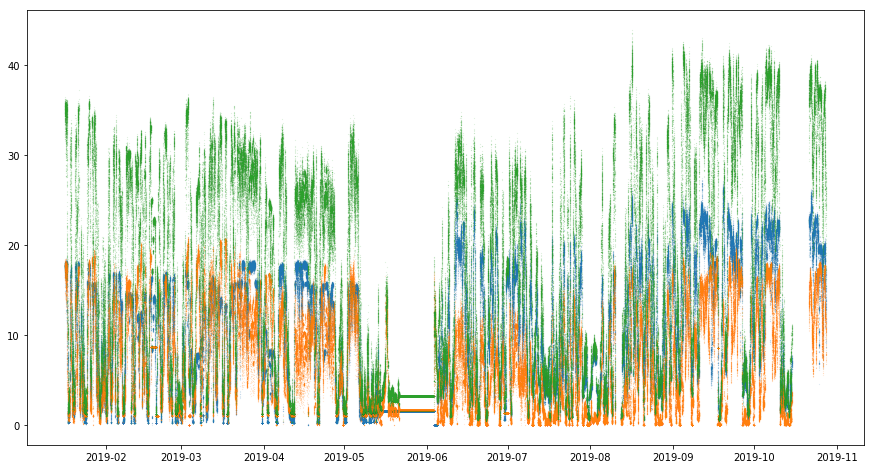

In [51]:
matplotlib.pyplot.plot_date(data['dt'],data['non_anm_generated'], xdate=True, ydate=False, fmt = '.', linewidth=1, markersize=0.1)
matplotlib.pyplot.plot_date(data['dt'],data['anm_generated'], xdate=True, ydate=False, fmt = '.', linewidth=1, markersize=0.1)
matplotlib.pyplot.plot_date(data['dt'],data['total_generated'], xdate=True, ydate=False, fmt = '.', linewidth=1, markersize=0.1)

In [16]:
%%sql
SELECT min(timestamp), max(timestamp) from readings
where non_anm_generated = 1.614 and substr(timestamp, 7, 1) = '5'

 * sqlite:///./database/eleclog_copy.db
Done.


min(timestamp),max(timestamp)
2019-05-07 07:58:06,2019-05-31 23:59:05


In [17]:
%%sql
SELECT min(timestamp), max(timestamp) from readings
where non_anm_generated = 1.614 and substr(timestamp, 6, 5) > '04-31' and substr(timestamp, 6, 5) < '06-14'

 * sqlite:///./database/eleclog_copy.db
Done.


min(timestamp),max(timestamp)
2019-05-07 07:58:06,2019-06-09 12:49:05


In [18]:
%%sql 
SELECT anm_generated, COUNT(*) count 
FROM readings 
GROUP BY anm_generated 
order by count desc
limit 10

 * sqlite:///./database/eleclog_copy.db
Done.


anm_generated,count
1.629,18526
0,3465
8.655,2684
1.331,1267
0.988,1258
1.330999,490
1.330998,367
1.331001,183
14.48,154
13.613,152


check fo odd demand readings

In [19]:
%%sql 
SELECT demand, COUNT(*) count 
FROM readings 
WHERE demand > 30
GROUP BY demand 
order by demand desc
limit 20


 * sqlite:///./database/eleclog_copy.db
Done.


demand,count
39.69,1
32.38,1
32.26,1
32.23,1
32.2,1
32.19,1
32.09,1
32,1
31.9,1
31.79,1


In [20]:
%%sql
SELECT demand_max,  COUNT(*) count, min(timestamp), max(timestamp) from readings
GROUP BY demand_max

 * sqlite:///./database/eleclog_copy.db
Done.


demand_max,count,min(timestamp),max(timestamp)
35.699999999999996,11863,2019-01-16 14:54:04,2019-10-27 21:19:05
35.7,383661,2019-01-16 14:36:03,2019-10-27 21:48:06
39.69,1,2019-04-08 04:14:05,2019-04-08 04:14:05
